In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

## Read and explore the data

In [3]:
airline = pd.read_csv('Jan_2020_ontime.csv')

pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 100)

airline.tail(10)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
607336,31,5,9E,20363,9E,N686BR,4806,14100,1410005,PHL,14492,1449202,RDU,557.0,0.0,0600-0659,733.0,0.0,0.0,0.0,337.0,NaN
607337,31,5,9E,20363,9E,N306PQ,4807,13487,1348702,MSP,11042,1104205,CLE,826.0,0.0,0800-0859,1124.0,0.0,0.0,0.0,622.0,NaN
607338,31,5,9E,20363,9E,N8936A,4809,13422,1342202,MOB,10397,1039707,ATL,550.0,0.0,0001-0559,818.0,0.0,0.0,0.0,302.0,NaN
607339,31,5,9E,20363,9E,N329PQ,4810,12953,1295304,LGA,11986,1198603,GRR,2052.0,0.0,2000-2059,2251.0,0.0,0.0,0.0,618.0,NaN
607340,31,5,9E,20363,9E,N909XJ,4811,14098,1409803,PHF,10397,1039707,ATL,558.0,0.0,0600-0659,754.0,0.0,0.0,0.0,508.0,NaN
607341,31,5,9E,20363,9E,N331CA,4812,15412,1541205,TYS,11433,1143302,DTW,1002.0,1.0,0700-0759,1128.0,1.0,0.0,0.0,443.0,NaN
607342,31,5,9E,20363,9E,N295PQ,4813,11433,1143302,DTW,12478,1247805,JFK,1747.0,0.0,1700-1759,1933.0,0.0,0.0,0.0,509.0,NaN
607343,31,5,9E,20363,9E,N294PQ,4814,11996,1199603,GSP,12953,1295304,LGA,554.0,0.0,0600-0659,752.0,0.0,0.0,0.0,610.0,NaN
607344,31,5,9E,20363,9E,N228PQ,4815,10397,1039707,ATL,15919,1591904,XNA,1714.0,0.0,1700-1759,1811.0,0.0,0.0,0.0,589.0,NaN
607345,31,5,9E,20363,9E,N228PQ,4815,15919,1591904,XNA,10397,1039707,ATL,1841.0,0.0,1800-1859,2128.0,0.0,0.0,0.0,589.0,NaN


In [4]:
airline['TAIL_NUM'].unique()

array(['N48901', 'N16976', 'N12167', ..., 'N29971', 'N7875A', 'N827NW'],
      dtype=object)

In [5]:
airline.dtypes

DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    object
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST                      object
DEP_TIME                 float64
DEP_DEL15                float64
DEP_TIME_BLK              object
ARR_TIME                 float64
ARR_DEL15                float64
CANCELLED                float64
DIVERTED                 float64
DISTANCE                 float64
Unnamed: 21              float64
dtype: object

<b>Check the unique Carrier Airline ID:

In [6]:
val1 = airline["OP_CARRIER_AIRLINE_ID"].values.ravel()
unique_values =  pd.unique(val1)
unique_values

array([20366, 19393, 20398, 20409, 19690, 19805, 20436, 20452, 20363,
       20378, 20397, 20416, 19790, 20304, 19977, 20368, 19930])

<b>check unique values of "CANCELLED" column.

In [7]:
value = airline["CANCELLED"].values.ravel()
cancel_stetus =  pd.unique(value) # if 0 then flight not diverted, if 1 then flight diverted
print(cancel_stetus)

[0. 1.]


<b>check total count of "CANCELLED" flights

In [8]:
null_columns=airline.columns[airline.isnull().any()]
cancelled = airline[airline['CANCELLED'] == 1]
cancelled_flights = (cancelled.groupby('CANCELLED')['CANCELLED'].count()).sort_values(ascending = False)
print(cancelled_flights)

CANCELLED
1.0    6928
Name: CANCELLED, dtype: int64


<b>Check total "DIVERTED" flights

In [9]:
value1 = airline["DIVERTED"].values.ravel()
cancel_status =  pd.unique(value) # if 0 then flight not diverted, if 1 then flight diverted
print(cancel_stetus)

[0. 1.]


<b>If "DIVERTED" value = 1, then check related columns and rows

In [10]:
pdf = airline.loc[airline['DIVERTED'] == 1]
pdf.count()

DAY_OF_MONTH             1150
DAY_OF_WEEK              1150
OP_UNIQUE_CARRIER        1150
OP_CARRIER_AIRLINE_ID    1150
OP_CARRIER               1150
TAIL_NUM                 1150
OP_CARRIER_FL_NUM        1150
ORIGIN_AIRPORT_ID        1150
ORIGIN_AIRPORT_SEQ_ID    1150
ORIGIN                   1150
DEST_AIRPORT_ID          1150
DEST_AIRPORT_SEQ_ID      1150
DEST                     1150
DEP_TIME                 1150
DEP_DEL15                1150
DEP_TIME_BLK             1150
ARR_TIME                 1003
ARR_DEL15                   0
CANCELLED                1150
DIVERTED                 1150
DISTANCE                 1150
Unnamed: 21                 0
dtype: int64

## Data wrangling and data cleaning

<b>Check if there are any null values in airline:

In [11]:
airline.isnull().any() 

DAY_OF_MONTH             False
DAY_OF_WEEK              False
OP_UNIQUE_CARRIER        False
OP_CARRIER_AIRLINE_ID    False
OP_CARRIER               False
TAIL_NUM                  True
OP_CARRIER_FL_NUM        False
ORIGIN_AIRPORT_ID        False
ORIGIN_AIRPORT_SEQ_ID    False
ORIGIN                   False
DEST_AIRPORT_ID          False
DEST_AIRPORT_SEQ_ID      False
DEST                     False
DEP_TIME                  True
DEP_DEL15                 True
DEP_TIME_BLK             False
ARR_TIME                  True
ARR_DEL15                 True
CANCELLED                False
DIVERTED                 False
DISTANCE                 False
Unnamed: 21               True
dtype: bool

<b>Drop unwanted columns from the datasets.

In [12]:
# Dropping below fields because they are having lots of bad data and not useful for my analysis
airline.drop(['Unnamed: 21', 'TAIL_NUM', 'OP_CARRIER'], axis = 1, inplace = True)

In [13]:
df = airline['ARR_TIME']
print("Total null values in ARR_TIME(arrival time) column : ", df.isnull().sum(axis = 0))
print("Out of : ", len(df))

df1 = airline['DEP_TIME']
print("Total null values in DEP_TIME(departure time) column : ", df1.isnull().sum(axis = 0))
print("Out of : ", len(df1))

df2 = airline['DEP_DEL15']
print("Total null values in DEP_DEL15(departure delay) column : ", df2.isnull().sum(axis = 0))
print("Out of : ", len(df2))


df3 = airline['ARR_DEL15']
print("Total null values in ARR_DEL15(arrival delay) column : ", df3.isnull().sum(axis = 0))
print("Out of : ", len(df3))

Total null values in ARR_TIME(arrival time) column :  7075
Out of :  607346
Total null values in DEP_TIME(departure time) column :  6664
Out of :  607346
Total null values in DEP_DEL15(departure delay) column :  6699
Out of :  607346
Total null values in ARR_DEL15(arrival delay) column :  8078
Out of :  607346


In [14]:
#airline['ARR_TIME'] = airline['ARR_TIME'].replace('-', np.nan)
#airline = airline.dropna(axis=0, subset=['ARR_TIME'])

<b>Rename some column names for better understanding.</b>

In [15]:
airline = airline.rename(columns={"OP_UNIQUE_CARRIER": "AIRLINES_USA", "DEP_DEL15": "DEPARTURE_DELAY", 
                                  "ARR_DEL15": "ARRIVAL_DELAY"})
airline

,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINES_USA,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEPARTURE_DELAY,DEP_TIME_BLK,ARR_TIME,ARRIVAL_DELAY,CANCELLED,DIVERTED,DISTANCE
0,1,3,EV,20366,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0
1,1,3,EV,20366,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0
2,1,3,EV,20366,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0
3,1,3,EV,20366,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0
4,1,3,EV,20366,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,31,5,9E,20363,4812,15412,1541205,TYS,11433,1143302,DTW,1002.0,1.0,0700-0759,1128.0,1.0,0.0,0.0,443.0
607342,31,5,9E,20363,4813,11433,1143302,DTW,12478,1247805,JFK,1747.0,0.0,1700-1759,1933.0,0.0,0.0,0.0,509.0
607343,31,5,9E,20363,4814,11996,1199603,GSP,12953,1295304,LGA,554.0,0.0,0600-0659,752.0,0.0,0.0,0.0,610.0
607344,31,5,9E,20363,4815,10397,1039707,ATL,15919,1591904,XNA,1714.0,0.0,1700-1759,1811.0,0.0,0.0,0.0,589.0


<b>Dependent null values on "CANCELLED" field.

In [16]:
null_columns=airline.columns[airline.isnull().any()]
cancelled = airline[airline['CANCELLED'] == 1]

print(cancelled[['DEP_TIME', 'DEPARTURE_DELAY', 'ARR_TIME', 'ARRIVAL_DELAY', 'CANCELLED']])

        DEP_TIME  DEPARTURE_DELAY  ARR_TIME  ARRIVAL_DELAY  CANCELLED
789          NaN              NaN       NaN            NaN        1.0
1931      2338.0              1.0       NaN            NaN        1.0
2751         NaN              NaN       NaN            NaN        1.0
3736         NaN              NaN       NaN            NaN        1.0
3776         NaN              NaN       NaN            NaN        1.0
...          ...              ...       ...            ...        ...
601038       NaN              NaN       NaN            NaN        1.0
601479       NaN              NaN       NaN            NaN        1.0
603963       NaN              NaN       NaN            NaN        1.0
604734       NaN              NaN       NaN            NaN        1.0
604891       NaN              NaN       NaN            NaN        1.0

[6928 rows x 5 columns]


In [21]:
_ = cancelled.fillna(999)
print(_[['DEP_TIME', 'DEPARTURE_DELAY', 'ARR_TIME', 'ARRIVAL_DELAY', 'CANCELLED']])

        DEP_TIME  DEPARTURE_DELAY  ARR_TIME  ARRIVAL_DELAY  CANCELLED
789        999.0            999.0     999.0          999.0        1.0
1931      2338.0              1.0     999.0          999.0        1.0
2751       999.0            999.0     999.0          999.0        1.0
3736       999.0            999.0     999.0          999.0        1.0
3776       999.0            999.0     999.0          999.0        1.0
...          ...              ...       ...            ...        ...
601038     999.0            999.0     999.0          999.0        1.0
601479     999.0            999.0     999.0          999.0        1.0
603963     999.0            999.0     999.0          999.0        1.0
604734     999.0            999.0     999.0          999.0        1.0
604891     999.0            999.0     999.0          999.0        1.0

[6928 rows x 5 columns]


<b>Dependent null values on "DIVERTED" field.

In [20]:
null_columns=airline.columns[airline.isnull().any()]
diverted = airline[airline['DIVERTED'] == 1]

print(diverted[['DEP_TIME', 'DEPARTURE_DELAY', 'ARR_TIME', 'ARRIVAL_DELAY', 'DIVERTED']])

        DEP_TIME  DEPARTURE_DELAY  ARR_TIME  ARRIVAL_DELAY  DIVERTED
1643      1756.0              0.0    2142.0            NaN       1.0
5025      1240.0              0.0    1707.0            NaN       1.0
5026       853.0              0.0    1240.0            NaN       1.0
5666      1723.0              1.0    2216.0            NaN       1.0
5685       852.0              0.0       NaN            NaN       1.0
...          ...              ...       ...            ...       ...
606452     921.0              0.0    1442.0            NaN       1.0
606522     758.0              1.0    1353.0            NaN       1.0
606547    2141.0              0.0     201.0            NaN       1.0
606989    1740.0              0.0     139.0            NaN       1.0
607321    1648.0              0.0    2202.0            NaN       1.0

[1150 rows x 5 columns]


<b> Change attributes names in 'OP_UNIQUE_CARRIER' short names to full names for better understanding of airlines. 

In [21]:
airline['AIRLINES_USA'].unique()

array(['EV', 'WN', 'MQ', 'B6', 'HA', 'AA', 'F9', 'YX', '9E', 'YV', 'OH',
       'NK', 'DL', 'OO', 'UA', 'G4', 'AS'], dtype=object)

In [22]:
airline["AIRLINES_USA"].replace({"EV":"Atlantic Southeast Airlines",
                                     "WN":"Southwest Airlines Co.",
                                     "MQ":"American Eagle Airlines",
                                     "B6":"JetBlue Airways",
                                     "HA":"Hawaiian Airlines",
                                     "AA":"American Airlines",
                                     "F9":"Frontier Airlines",
                                     "YX":"Republic Airways",
                                     "9E":"Endeavor Air",
                                     "YV":"Mesa Airlines",
                                     "OH":"PSA Airlines",
                                     "NK":"Spirit Airlines",
                                     "DL":"Delta Air Lines",
                                     "OO":"SkyWest Airlines",
                                     "UA":"United Air Lines",
                                     "G4":"Allegiant Air",
                                     "AS":"Alaska Airlines"}, inplace=True)

<b>Replace week_of_day from number to actual day name

In [23]:
airline["DAY_OF_WEEK"].replace({1:"Monday",
                                     2:"Tuesday",
                                     3:"Wednesday",
                                     4:"Thursday",
                                     5:"Friday",
                                     6:"Saturday",
                                     7:"Sunday"}, inplace=True)

In [24]:
#airline.corr(method='kendall')

<b>Convert column datapye from float to integer or float to object

In [25]:
airline.CANCELLED = airline.CANCELLED.astype(int)

In [26]:
airline.DEP_TIME = airline.DEP_TIME.astype(object)

In [27]:
airline.ARR_TIME = airline.ARR_TIME.astype(object)

In [28]:
airline.ARRIVAL_DELAY = airline.ARRIVAL_DELAY.astype(object)

In [29]:
airline.DEPARTURE_DELAY = airline.DEPARTURE_DELAY.astype(object)

In [30]:
#airline

In [31]:
#airline.ARRIVAL_DELAY = airline.ARRIVAL_DELAY.astype(int)
#airline.DEPARTURE_DELAY = airline.DEPARTURE_DELAY.astype(int)

What happened if I delete all null values? I found that I can not remove all null values, because it also delete useful rows from the other columns. Hence, I decided to replace null values with appropriate values and datatypes.

In [32]:
#filling missing values with description
#airline["DEP_TIME"].fillna("not aplicable", inplace = True) 
#airline["DEPARTURE_DELAY"].fillna(0.00, inplace = True) 
#airline["ARR_TIME"].fillna("not aplicable", inplace = True) 
#airline["ARRIVAL_DELAY"].fillna(0.00, inplace = True)

## Data visualization and understanding of data

### ANALYSIS 1:
<b>Return flights, who cancelled flight frequently in January, 2020.

In [33]:
# If value = 1 means flight CANCELLED
airline1 = airline.loc[airline['CANCELLED'] == 1]
cancelled_flights1 = (airline1.groupby('AIRLINES_USA')['CANCELLED'].count()).sort_values(ascending = False)
total_flights = (airline.groupby('AIRLINES_USA')['CANCELLED'].count()).sort_values(ascending = False)
flight = airline['AIRLINES_USA'].unique()
print("\033[4m", "Cancelled flights out of total flights")
print()

fmt = '{:<8}{:<30}{:<20}{}'

#print cancelled flights out of total flights groupby "AIRLINES_USA"
print(fmt.format('','Airline', 'Cancelled flights', 'Total_flights'), "\033[24m")
for i, (flt, cancel, total) in enumerate(zip(flight, cancelled_flights1, total_flights)):
    print(fmt.format(i, flt, cancel, total))

 Cancelled flights out of total flights

        Airline                       Cancelled flights   Total_flights 
0       Atlantic Southeast Airlines   1921                109770
1       Southwest Airlines Co.        1461                80067
2       American Eagle Airlines       834                 76276
3       JetBlue Airways               685                 71160
4       Hawaiian Airlines             297                 48401
5       American Airlines             295                 29123
6       Frontier Airlines             272                 26200
7       Republic Airways              262                 24709
8       Endeavor Air                  252                 24309
9       Mesa Airlines                 147                 23068
10      PSA Airlines                  145                 21110
11      Spirit Airlines               119                 17836
12      Delta Air Lines               86                  17477
13      SkyWest Airlines              76             

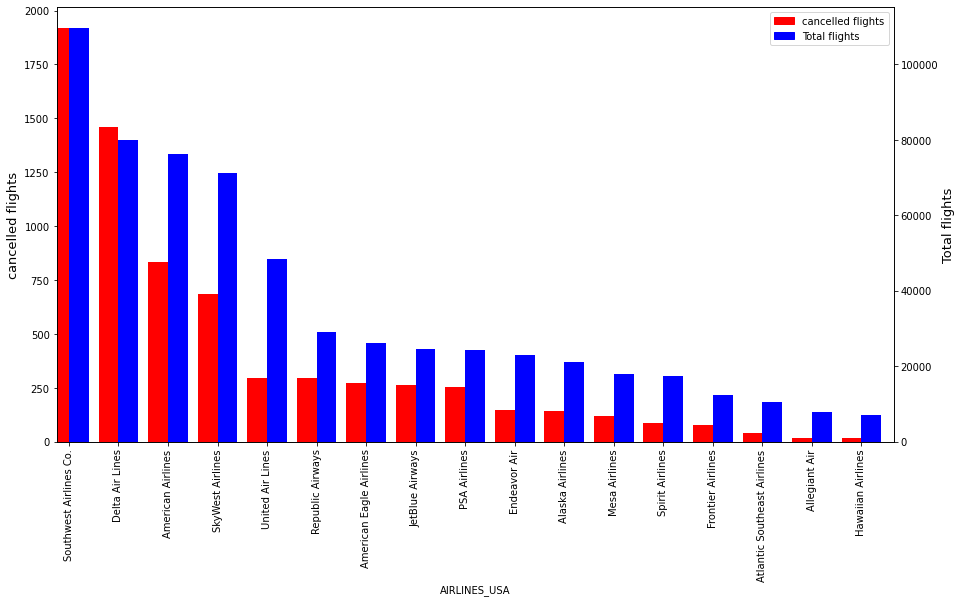

In [52]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

cancelled_flights1.plot(kind='bar', color='red',  figsize = (15,8), ax=ax, width=width, position=1)
total_flights.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('cancelled flights', fontsize= 13)
ax2.set_ylabel('Total flights', fontsize= 13)

colors = {'cancelled flights':'red', 'Total flights':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()

### ANALYSIS 2:

<b>Check flights who delayed in departure time frequently

In [57]:
airline2 = airline.loc[airline['DEPARTURE_DELAY'] == 1] 

delayed_flights2 = (airline2.groupby('AIRLINES_USA')['DEPARTURE_DELAY'].count()).sort_values(ascending = False)
total_flights1 = (airline.groupby('AIRLINES_USA')['DEPARTURE_DELAY'].count()).sort_values(ascending = False)
flight = airline['AIRLINES_USA'].unique()

print("\033[4m", "Departure delayed flights out of total flights")
print()

fmt = '{:<8}{:<30}{:<20}{}'

print(fmt.format('', 'Airline', 'Dp delayed flights', 'Total flights'), "\033[24m")
for i, (flt, cancel, total) in enumerate(zip(flight, delayed_flights2, total_flights1)):
    print(fmt.format(i, flt, cancel, total))

 Departure delayed flights out of total flights

        Airline                       Dp delayed flights  Total flights 
0       Atlantic Southeast Airlines   13381               107879
1       Southwest Airlines Co.        11000               80027
2       American Eagle Airlines       10836               75616
3       JetBlue Airways               8095                69739
4       Hawaiian Airlines             6165                48119
5       American Airlines             4656                28883
6       Frontier Airlines             4299                25397
7       Republic Airways              3863                24693
8       Endeavor Air                  3735                24068
9       Mesa Airlines                 2964                22998
10      PSA Airlines                  2802                20852
11      Spirit Airlines               2580                17559
12      Delta Air Lines               2403                17362
13      SkyWest Airlines              1888   

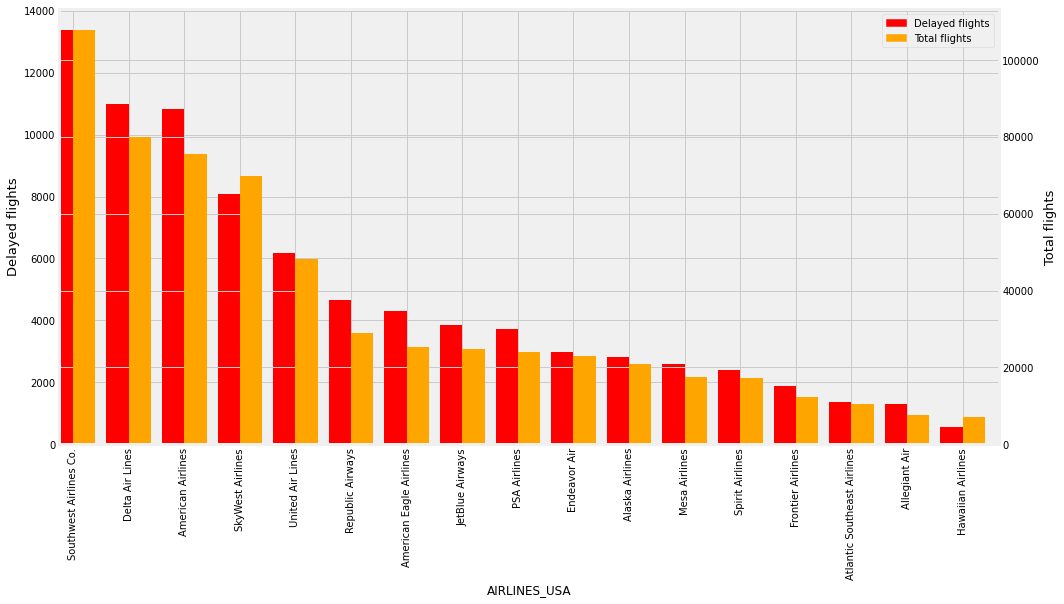

In [58]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

delayed_flights2.plot(kind='bar', color='red',  figsize = (15,8), ax=ax, width=width, position=1)
total_flights1.plot(kind='bar', color='orange', ax=ax2, width=width, position=0)

ax.set_ylabel('Delayed flights', fontsize= 13)
ax2.set_ylabel('Total flights', fontsize= 13)

colors = {'Delayed flights':'red', 'Total flights':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()

### ANALYSIS 3:
<b>Check flights delayed in arrival time

In [59]:
airline3 = airline.loc[airline['ARRIVAL_DELAY'] == 1] 

Arrival_flights = (airline3.groupby('AIRLINES_USA')['ARRIVAL_DELAY'].count()).sort_values(ascending = False)
total_flights2 = (airline.groupby('AIRLINES_USA')['DEPARTURE_DELAY'].count()).sort_values(ascending = False)

flight = airline['AIRLINES_USA'].unique()

print("\033[4m", "Arrival delayed flights out of total flights")
print()

fmt = '{:<8}{:<30}{:<20}{}'

print(fmt.format('', 'flight', 'ARR delayed flights', 'Total flights'), "\033[24m")
for i, (flt, cancel, total) in enumerate(zip(flight, Arrival_flights, total_flights2)):
    print(fmt.format(i, flt, cancel, total))

 Arrival delayed flights out of total flights

        flight                        ARR delayed flights Total flights 
0       Atlantic Southeast Airlines   11348               107879
1       Southwest Airlines Co.        10692               80027
2       American Eagle Airlines       10321               75616
3       JetBlue Airways               8459                69739
4       Hawaiian Airlines             6235                48119
5       American Airlines             5166                28883
6       Frontier Airlines             4979                25397
7       Republic Airways              4393                24693
8       Endeavor Air                  3675                24068
9       Mesa Airlines                 3428                22998
10      PSA Airlines                  3118                20852
11      Spirit Airlines               2515                17559
12      Delta Air Lines               2334                17362
13      SkyWest Airlines              1795     

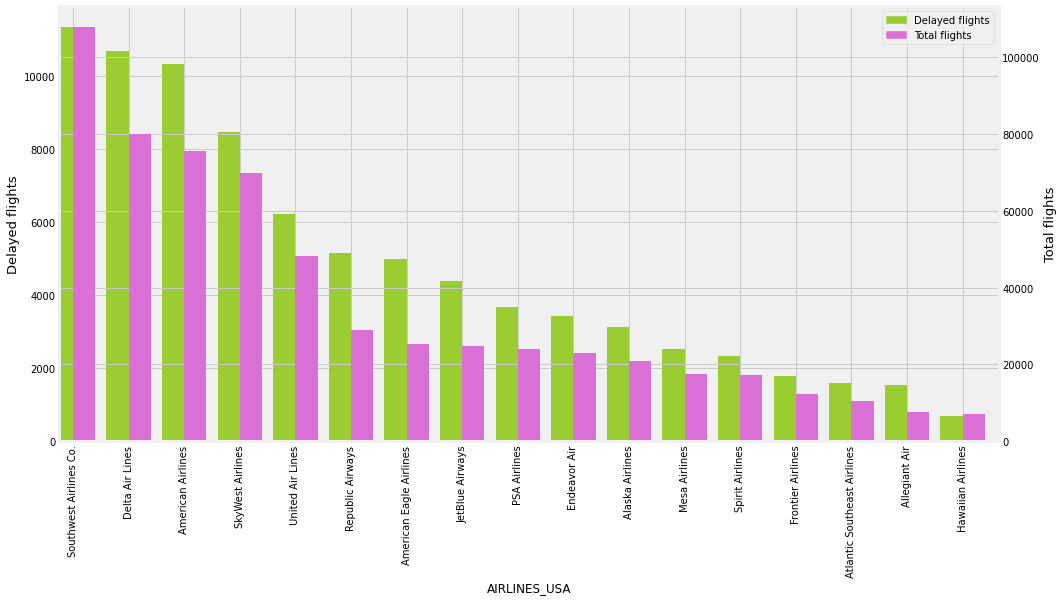

In [60]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

Arrival_flights.plot(kind='bar', color='yellowgreen',  figsize = (15,8), ax=ax, width=width, position=1)
total_flights2.plot(kind='bar', color='orchid', ax=ax2, width=width, position=0)

ax.set_ylabel('Delayed flights', fontsize= 13)
ax2.set_ylabel('Total flights', fontsize= 13)

colors = {'Delayed flights':'yellowgreen', 'Total flights':'orchid'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()

In [61]:
# flights delayed to arraival of destination over a month of January,2020 

#Arrival_flights[:10].plot(kind = 'pie', figsize=(15,10), shadow = True, explode = (0.1, 0, 0, 0, 0,0,0,0,0,0), 
 #                   autopct = '%1.1f%%', title='Top ten frequently Delayed flights to destination location over the month of January, 
  #                        2020 in perecentage');

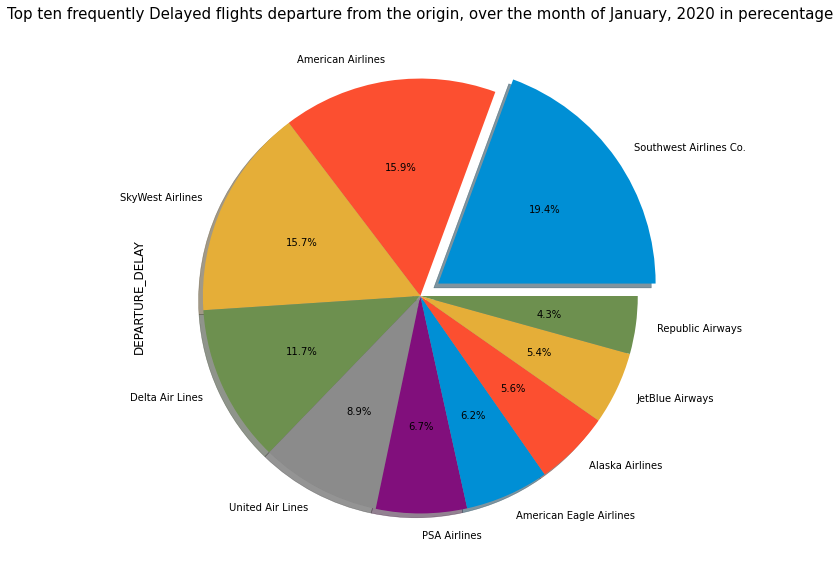

In [62]:
# which flights delayed departure from the origin over the month of January,2020 
plt.title('Top ten frequently Delayed flights departure from the origin, over the month of January, 2020 in perecentage', 
          fontsize= 15)

delayed_flights2[:10].plot(kind = 'pie', figsize=(15,10), shadow = True, explode = (0.1, 0, 0, 0, 0,0,0,0,0,0), 
                    autopct = '%1.1f%%');

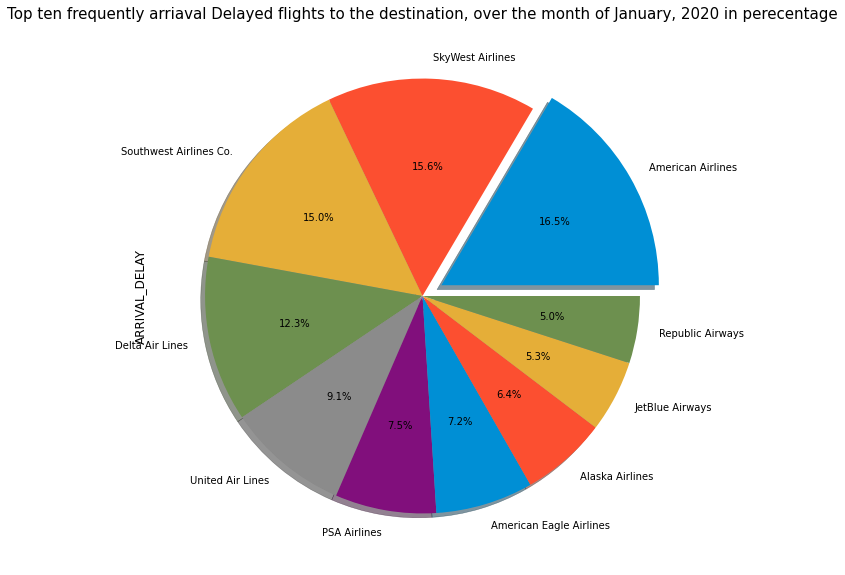

In [63]:
# which flights delayed in arriaval from the origin over the month of January,2020 
plt.title('Top ten frequently arriaval Delayed flights to the destination, over the month of January, 2020 in perecentage', 
          fontsize= 15)

Arrival_flights[:10].plot(kind = 'pie', figsize=(15,10), shadow = True, explode = (0.1, 0, 0, 0, 0,0,0,0,0,0), 
                    autopct = '%1.1f%%');

In [64]:
# number of flights arrival delayed by day of month
airline1 = airline.loc[airline['ARRIVAL_DELAY'] == 1]
cancelled_flights_Month1 = (airline1.groupby('DAY_OF_MONTH')['ARRIVAL_DELAY'].count()).sort_values(ascending = False)

#plt.title('Top 10 days: number of flights arrival delayed by day of month', fontsize= 20)
#sns.set(rc={'figure.figsize':(27,9)})
#barPlotChart = sns.barplot(x="DAY_OF_MONTH", y="ARRIVAL_DELAY", data=airline)
#for xLable in barPlotChart.get_xticklabels():
#    xLable.set_rotation(90)

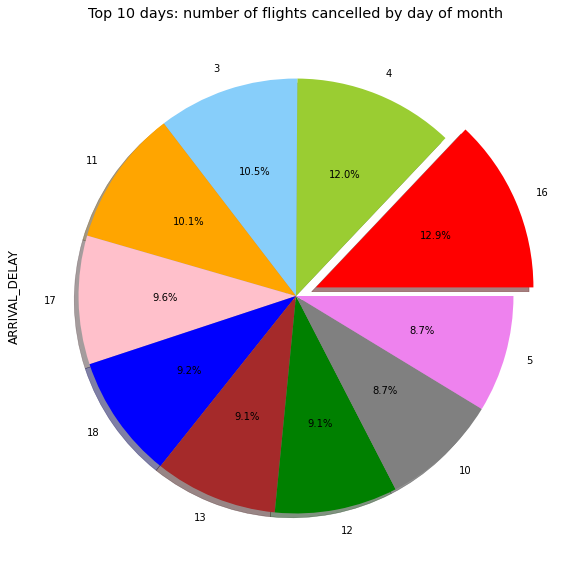

In [65]:
colors = ['red','yellowgreen','lightskyblue', 'orange', 'pink', 'blue', 'brown', 'green', 'grey', 'violet']
cancelled_flights_Month1[:10].plot(kind = 'pie', figsize=(15,10), shadow = True, 
                                   explode = (0.1, 0, 0, 0, 0,0,0,0,0,0), colors=colors,
                                  autopct = '%1.1f%%', title='Top 10 days: number of flights cancelled by day of month');

"DEP_TIME_BLK" represents the departure time block, hourly based. I want to check busiest time to fly the flights using this field.

In [66]:
#Dep_Block = airline.loc[airline['DEP_TIME_BLK']] 

Dep_Block = (airline.groupby('DAY_OF_WEEK')['DEP_TIME_BLK'].count()).sort_values(ascending = False)

print(Dep_Block)

DAY_OF_WEEK
Friday       103812
Thursday     103676
Wednesday     96799
Monday        82389
Sunday        78506
Tuesday       76644
Saturday      65520
Name: DEP_TIME_BLK, dtype: int64


Text(0.5, 1.0, 'Flights fly over days of week')

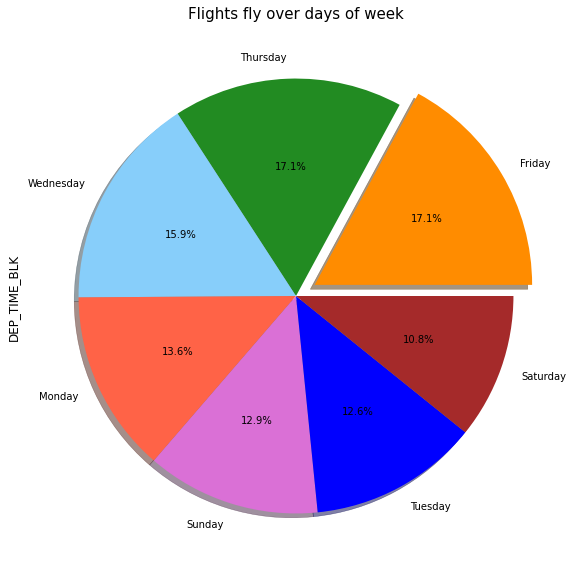

In [67]:
#flights fly over days of week
colors = ['darkorange','forestgreen','lightskyblue', 'tomato', 'orchid', 'blue', 'brown', 'green', 'grey', 'violet']
Dep_Block.plot(kind = 'pie', figsize=(15,10), shadow = True, explode = (0.1, 0, 0, 0, 0,0,0), 
                                   colors=colors, autopct = '%1.1f%%');
plt.title("Flights fly over days of week", fontsize= 15)

Does Flights gets delayed on Friday? Let's, see

In [68]:
airlinea = airline.loc[airline['ARRIVAL_DELAY'] == 1] 

Dep_dely = (airlinea.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].count()).sort_values(ascending = False)
Dep_dely.head(30)

DAY_OF_WEEK
Friday       16294
Thursday     14165
Saturday     13442
Monday       10941
Sunday       10578
Wednesday     9403
Tuesday       7462
Name: ARRIVAL_DELAY, dtype: int64

Text(0.5, 1.0, 'Flights delayed in arrival over days of week')

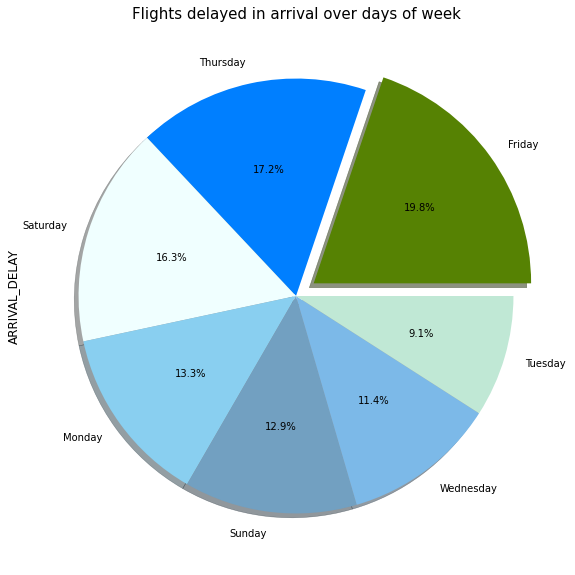

In [69]:
#flights delayed in arrival over days of week
colors = ['#568203','#007FFF','#F0FFFF', '#89CFF0', '#72A0C1', '#7CB9E8', '#C0E8D5']
Dep_dely.plot(kind = 'pie', figsize=(15,10), shadow = True, explode = (0.1, 0, 0, 0, 0,0,0), 
                                   colors=colors, autopct = '%1.1f%%');
plt.title("Flights delayed in arrival over days of week", fontsize= 15)

In [70]:
#Flights take off on Friday
airline111 = airline.loc[(airline['DAY_OF_WEEK'] == 'Friday') & (airline['ARRIVAL_DELAY'] == 1)]

friday_flights = (airline111.groupby('AIRLINES_USA')['DAY_OF_WEEK'].count()).sort_values(ascending = False)
friday_flights

AIRLINES_USA
American Airlines              2438
Southwest Airlines Co.         2074
SkyWest Airlines               1949
Delta Air Lines                1890
United Air Lines               1279
PSA Airlines                   1047
American Eagle Airlines         959
Alaska Airlines                 899
Republic Airways                641
Endeavor Air                    563
JetBlue Airways                 550
Mesa Airlines                   481
Spirit Airlines                 413
Allegiant Air                   383
Frontier Airlines               333
Atlantic Southeast Airlines     263
Hawaiian Airlines               132
Name: DAY_OF_WEEK, dtype: int64

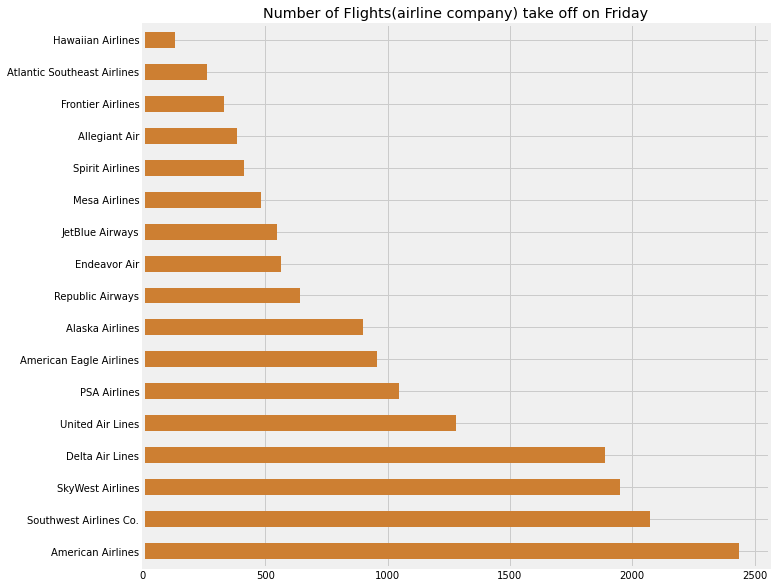

In [71]:
#Cancelled flights from their origin places
friday_flights.plot(kind = 'barh', color = '#cd7f32', figsize = (10,10), title = 'Number of Flights(airline company) take off on Friday').yaxis.label.set_visible(False);
